# General data reader for AQUA 
## Detrending

For some analysis, removing from the data a linear trend can be helpful to highlight the internal variability.
The ``detrend`` method can be used as a high-level wrapper of xarray functionalities to achieve this goal. We can show this functionality by analysing ERA5 2m temperature. 

In [1]:
from aqua import Reader

reader = Reader(model="ERA5", exp="era5", source="monthly")
data = reader.retrieve(var='2t')
data

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 1008, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Data variables:
    2t       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Apr 05 04:30:18 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We can estimate the yearly global average and then plot it, combining some of the powerful AQUA functionalities. 

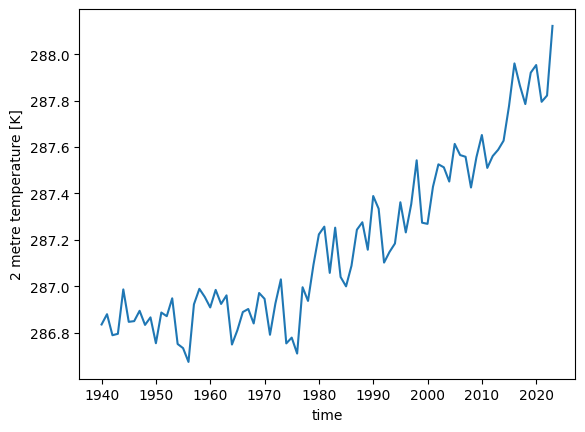

In [2]:
yearly = reader.fldmean(reader.timmean(data['2t'], freq='yearly'))
yearly.plot()

The detrend method applies by defaul a linear fit along the time dimension, so that we can easily obtain a detrend timeseries by just calling it (here below using the AQUA accessor)!

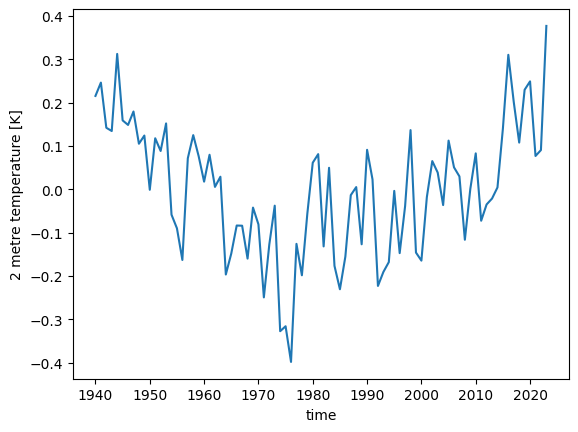

In [3]:
yearly.aqua.detrend().plot()

We can of course apply detrending on the 3D field, though this would be heavier from the computational point of view, and detrend along dimension different than time (although this has limited physical meaning). We can also detrend with an higher order polynominial by specifying the `degree` key. This must be used with caution. 

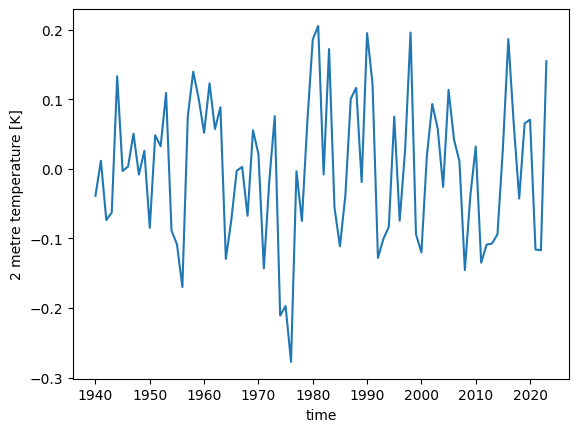

In [4]:
yearly.aqua.detrend(degree=3).plot()

## Coefficients

The coefficients of the polynomial fit can be obtained by using the `coeffs` method inherited by the Trender class. This will return a DataArray with the coefficients of the polynomial fit, which can be useful for further analysis or visualization.

In [8]:
coeff = reader.trender.coeffs(yearly, degree=1)

2025-06-25 18:44:34 :: Trender :: INFO     -> Applying _coeffs with polynomial of order 1 along 'time' dimension.


In [10]:
coeff.values

array([4.29664955e-19, 2.87026468e+02])